### Forecasting the outflow of clients of the mobile operator

#### Vasilyeu Siarhei, vasiluev@tut.by, +375 29 7731272

### 1. Import libraries and load data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import auc
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
train = pd.read_csv("train.csv", sep=';')
test = pd.read_csv("test.csv", sep=';')

In [8]:
# Verify the correctness of the load
train.head()

,USER_ID,ACT_DATE,STATUS,TP_CURRENT,TP_CHANGES_NUM,START_PACK,OFFER_GROUP,BIRTHDAY,GENDER,MLLS_STATE,PORTED_IN,PORTED_OUT,OBLIG_NUM,OBLIG_ON_START,ASSET_TYPE_LAST,DEVICE_TYPE_BUS,USAGE_AREA,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16,ACTIVITY_DEC_16
0,6925431,2012-06-21,D,TP_STATE,0.0,NaN,NaN,1988-04-12,M,NaN,False,False,NaN,False,NaN,Undefined,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0
1,8027797,2013-11-05,D,TP_DL012,20.0,Commercial,Standard,1984-01-02,M,Active,False,False,NaN,False,NaN,Smartphone,Minsk,150000.0,90000.0,337.433333,821.266667,2319.0,2896.0,14.171355,9.75,1
2,23498773,2015-07-17,D,TP_L,0.0,Commercial,Promo,1996-09-09,M,Active,False,False,NaN,False,NaN,Smartphone,Minsk,180000.0,100000.0,396.033333,145.466667,80369.0,15803.0,16.170000,10.74,1
3,7039091,2012-08-02,D,TP_DL012,1.0,Commercial,Standard,NaN,M,NaN,False,False,NaN,False,NaN,Smartphone,Regional Cities,100000.0,80000.0,234.900000,306.283333,1155.0,1695.0,8.780000,9.42,1
4,7510978,2013-03-06,D,TP_ANDR,0.0,NaN,NaN,1991-03-16,F,Active,False,False,NaN,False,Smartphone,Undefined,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0


In [9]:
test.head()

,USER_ID,ACT_DATE,STATUS,TP_CURRENT,TP_CHANGES_NUM,START_PACK,OFFER_GROUP,BIRTHDAY,GENDER,MLLS_STATE,PORTED_IN,PORTED_OUT,OBLIG_NUM,OBLIG_ON_START,ASSET_TYPE_LAST,DEVICE_TYPE_BUS,USAGE_AREA,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16
0,24588883,2016-04-19,Q,TP_3GM,0.0,Commercial,Promo,1983-08-26,M,NaN,False,False,NaN,False,NaN,Modem/Router,Regional Cities,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000
1,22709104,2014-11-22,D,TP_XS,0.0,Commercial,Standard,1981-03-19,F,NaN,False,False,NaN,False,NaN,Other,Local Towns,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000,0.000
2,608546,2009-04-02,D,TP_FREE,0.0,NaN,NaN,NaN,F,NaN,False,False,NaN,False,NaN,Smartphone,Countryside,150000.0,0.0,59.483333,46.850000,8.0,3.0,8.055,5.855
3,6309892,2011-12-15,D,TP_ANDR,0.0,NaN,NaN,1984-11-28,M,NaN,False,False,NaN,False,Smartphone,Undefined,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000,0.000
4,7556468,2013-06-17,D,TP_DL012,0.0,Commercial,Standard,1992-08-31,F,NaN,False,False,NaN,False,NaN,Smartphone,Minsk,60000.0,90000.0,260.200000,266.066667,4205.0,4727.0,9.810,9.370


### 2. Explore the data and process the missing values

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29208 entries, 0 to 29207
Data columns (total 26 columns):
USER_ID            29208 non-null int64
ACT_DATE           29208 non-null object
STATUS             29208 non-null object
TP_CURRENT         29208 non-null object
TP_CHANGES_NUM     29208 non-null float64
START_PACK         23796 non-null object
OFFER_GROUP        23796 non-null object
BIRTHDAY           25278 non-null object
GENDER             28600 non-null object
MLLS_STATE         4789 non-null object
PORTED_IN          29208 non-null bool
PORTED_OUT         29208 non-null bool
OBLIG_NUM          5061 non-null float64
OBLIG_ON_START     29208 non-null bool
ASSET_TYPE_LAST    9281 non-null object
DEVICE_TYPE_BUS    29208 non-null object
USAGE_AREA         23067 non-null object
REFILL_OCT_16      26155 non-null float64
REFILL_NOV_16      26155 non-null float64
OUTGOING_OCT_16    26842 non-null float64
OUTGOING_NOV_16    26842 non-null float64
GPRS_OCT_16        26842 non-null 

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
USER_ID            20000 non-null int64
ACT_DATE           20000 non-null object
STATUS             20000 non-null object
TP_CURRENT         20000 non-null object
TP_CHANGES_NUM     20000 non-null float64
START_PACK         16249 non-null object
OFFER_GROUP        16249 non-null object
BIRTHDAY           17232 non-null object
GENDER             19541 non-null object
MLLS_STATE         3182 non-null object
PORTED_IN          20000 non-null bool
PORTED_OUT         20000 non-null bool
OBLIG_NUM          3484 non-null float64
OBLIG_ON_START     20000 non-null bool
ASSET_TYPE_LAST    6289 non-null object
DEVICE_TYPE_BUS    20000 non-null object
USAGE_AREA         15792 non-null object
REFILL_OCT_16      17890 non-null float64
REFILL_NOV_16      17890 non-null float64
OUTGOING_OCT_16    18428 non-null float64
OUTGOING_NOV_16    18428 non-null float64
GPRS_OCT_16        18428 non-null 

In [12]:
# Define the function to fill the missing values
def replace_nan(data):
    # в столбцах 'START_PACK' и 'OFFER_GROUP' заменим NaN на 'Unknown'
    data['START_PACK'] = data['START_PACK'].fillna('Unknown')
    data['OFFER_GROUP'] = data['OFFER_GROUP'].fillna('Unknown')
    
    # столбцы с датами приведем к формату datetime
    data['ACT_DATE'] = pd.to_datetime(data['ACT_DATE'], format='%Y-%m-%d', errors='ignore')
    data['BIRTHDAY'] = pd.to_datetime(data['BIRTHDAY'], format='%Y-%m-%d', errors='ignore')
    
    # в столбце GENDER заменим NaN на M, так как 16034 из 28600 записей имеют значение M
    data['GENDER'] = data['GENDER'].fillna('M')
    
    # по условию задачи, NaN в столбце 'MLLS_STATE' означает что абонент не является участником программы лояльности
    data['MLLS_STATE'] = data['MLLS_STATE'].fillna('No')
    
    # по условиям задачи NaN в столбце 'OBLIG_NUM' означает, что абонент не пользовался рассрочкой
    data['OBLIG_NUM'] = data['OBLIG_NUM'].fillna(0.0)
    
    # NaN в столбце 'ASSET_TYPE_LAST' вероятно означает, что абонент не приобретал оборудование в компании
    data['ASSET_TYPE_LAST'] = data['ASSET_TYPE_LAST'].fillna('Not buying')
    
    # в столбце 'USAGE_AREA' заменим NaN на 'Undefined'
    data['USAGE_AREA'] = data['USAGE_AREA'].fillna('Undefined')
    
    # в остальных столбцах заменим NaN  на 0.0, считая что отсутствие данных означает отсутствие активности
    data['REFILL_OCT_16'] = data['REFILL_OCT_16'].fillna(0.0)
    data['REFILL_NOV_16'] = data['REFILL_NOV_16'].fillna(0.0)
    data['OUTGOING_OCT_16'] = data['OUTGOING_OCT_16'].fillna(0.0)
    data['OUTGOING_NOV_16'] = data['OUTGOING_NOV_16'].fillna(0.0)
    data['GPRS_OCT_16'] = data['GPRS_OCT_16'].fillna(0.0)
    data['GPRS_NOV_16'] = data['GPRS_NOV_16'].fillna(0.0)
    data['REVENUE_OCT_16'] = data['REVENUE_OCT_16'].fillna(0.0)
    data['REVENUE_NOV_16'] = data['REVENUE_NOV_16'].fillna(0.0)

In [13]:
# переведем BYR  в BYN
def byr_to_byn(data):
    data['REFILL_OCT_16'] = data['REFILL_OCT_16']/10000.0
    data['REFILL_NOV_16'] = data['REFILL_NOV_16']/10000.0

In [14]:
# Create several new features
def new_features(data):
    
    # срок с даты подключения до 1 декабря 2016 в днях
    data['AGE_ACT'] = [int(i.days) for i in (pd.datetime(2016, 12, 1) - data['ACT_DATE'])]
    
    # день недели, в который состоялось подключение
    data['WEEKDAY'] = data['ACT_DATE'].dt.dayofweek
    
    # добавим год рождения абонента и заменим пропущенные данные средним
    data['BIRTH_YEAR'] = pd.DatetimeIndex(data['BIRTHDAY']).year
    data['BIRTH_YEAR'] = data['BIRTH_YEAR'].fillna(data['BIRTH_YEAR'].mean())
        
    # добавим столбец с возрастом абонента на момент подключения
    data['AGE_AB'] = pd.DatetimeIndex(data['ACT_DATE']).year - data['BIRTH_YEAR']
    
    # добавим столбцы с разностями показателей ноября и октября
    data['REFIL_DELTA'] = data['REFILL_NOV_16'] - data['REFILL_OCT_16']
    data['OUTGOING_DELTA'] = data['OUTGOING_NOV_16'] - data['OUTGOING_OCT_16']
    data['GPRS_DELTA'] = data['GPRS_NOV_16'] - data['GPRS_OCT_16']
    data['REVENUE_DELTA'] = data['REVENUE_NOV_16'] - data['REVENUE_OCT_16']
    
    # удалим столбецы 'BIRTHDAY' и 'ACT_DATE'
    del data['BIRTHDAY']
    del data['ACT_DATE']

In [15]:
# переведем BYR в BYN
byr_to_byn(train)
byr_to_byn(test)

In [16]:
# Process the training data
replace_nan(train)
new_features(train)

In [17]:
# Process the test data
replace_nan(test)
new_features(test)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29208 entries, 0 to 29207
Data columns (total 32 columns):
USER_ID            29208 non-null int64
STATUS             29208 non-null object
TP_CURRENT         29208 non-null object
TP_CHANGES_NUM     29208 non-null float64
START_PACK         29208 non-null object
OFFER_GROUP        29208 non-null object
GENDER             29208 non-null object
MLLS_STATE         29208 non-null object
PORTED_IN          29208 non-null bool
PORTED_OUT         29208 non-null bool
OBLIG_NUM          29208 non-null float64
OBLIG_ON_START     29208 non-null bool
ASSET_TYPE_LAST    29208 non-null object
DEVICE_TYPE_BUS    29208 non-null object
USAGE_AREA         29208 non-null object
REFILL_OCT_16      29208 non-null float64
REFILL_NOV_16      29208 non-null float64
OUTGOING_OCT_16    29208 non-null float64
OUTGOING_NOV_16    29208 non-null float64
GPRS_OCT_16        29208 non-null float64
GPRS_NOV_16        29208 non-null float64
REVENUE_OCT_16     29208 non-

Now we have test and train data sets without missing data and with a few new features

### 3. Preparing data for machine learning

In [19]:
# Conversion of categorical data
le = LabelEncoder()
for n in ['STATUS', 'TP_CURRENT', 'START_PACK', 'OFFER_GROUP', 'GENDER', 'MLLS_STATE', 
         'PORTED_IN', 'PORTED_OUT', 'OBLIG_ON_START', 'ASSET_TYPE_LAST', 'DEVICE_TYPE_BUS', 'USAGE_AREA']:
    le.fit(train[n])
    train[n] = le.transform(train[n])
    test[n] = le.transform(test[n])

In [20]:
# Standardization of data
features = list(train.columns)
del features[0]
del features[22]
scaler = StandardScaler()
for n in features:
    scaler.fit(train[n])
    train[n] = scaler.transform(train[n])
    test[n] = scaler.transform(test[n])

In [21]:
# Break train into training and test set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train.ACTIVITY_DEC_16, 
                                                    test_size=0.20, 
                                                    random_state=123)

### 4. Built the first model to all features

In [82]:
# Ensemble of classifiers by Weighted Average Probabilities
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SGDClassifier(loss='log', random_state=42)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('sgd', clf3)], voting='soft', weights=[1,1,1])

In [83]:
# Quality control of the model by cross-validation with calculation of ROC AUC
for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Random Forest', 'SGD', 'Ensemble']):
    scores2 = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.6f (+/- %0.6f) [%s]" % (scores2.mean(), scores2.std(), label))

ROC AUC: 0.950789 (+/- 0.003721) [Logistic Regression]
ROC AUC: 0.965873 (+/- 0.002750) [Random Forest]
ROC AUC: 0.942739 (+/- 0.003452) [SGD]
ROC AUC: 0.967651 (+/- 0.002257) [Ensemble]


On the training data, the best result is provided by an ensemble of three algorithms

### 5. Determine the importance of attributes using the Random Forest

Feature ranking:
1. STATUS (0.216260)
2. USAGE_AREA (0.132873)
3. DEVICE_TYPE_BUS (0.124227)
4. REVENUE_NOV_16 (0.056666)
5. AGE_ACT (0.037424)
6. OUTGOING_NOV_16 (0.037003)
7. REVENUE_OCT_16 (0.035002)
8. REFILL_NOV_16 (0.034487)
9. TP_CURRENT (0.028480)
10. REFILL_OCT_16 (0.027266)
11. OUTGOING_OCT_16 (0.026455)
12. AGE_AB (0.022518)
13. BIRTH_YEAR (0.022161)
14. REVENUE_DELTA (0.021722)
15. GPRS_NOV_16 (0.021616)
16. WEEKDAY (0.019760)
17. OUTGOING_DELTA (0.018844)
18. REFIL_DELTA (0.015466)
19. GPRS_OCT_16 (0.014200)
20. GPRS_DELTA (0.013153)
21. ASSET_TYPE_LAST (0.011533)
22. START_PACK (0.011499)
23. OFFER_GROUP (0.010530)
24. MLLS_STATE (0.009586)
25. GENDER (0.008435)
26. TP_CHANGES_NUM (0.007186)
27. PORTED_IN (0.006455)
28. OBLIG_ON_START (0.005277)
29. OBLIG_NUM (0.003913)
30. PORTED_OUT (0.000000)


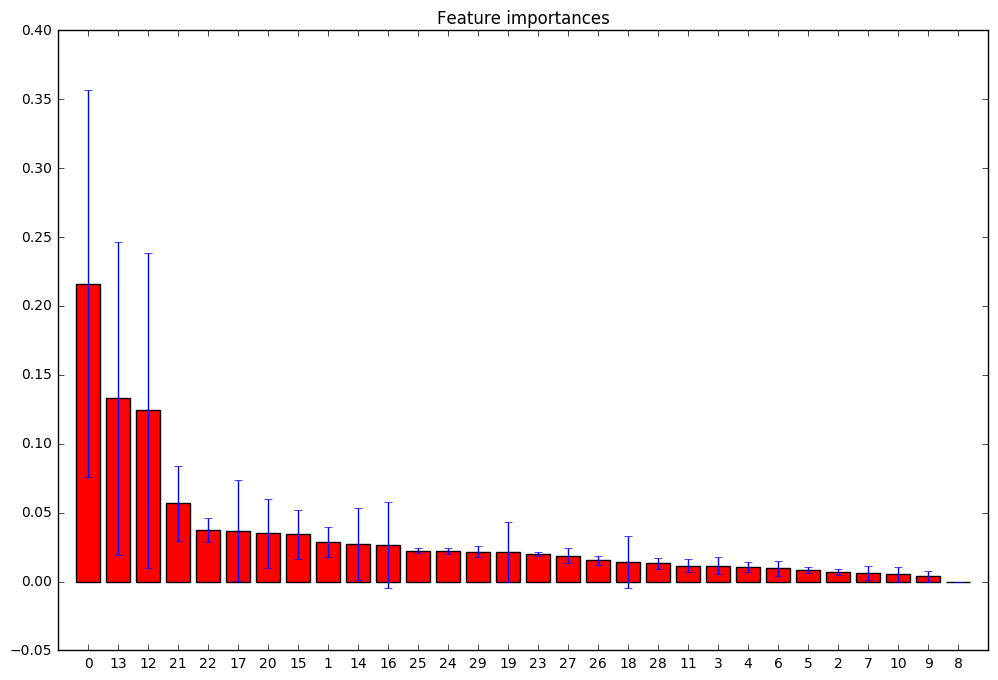

In [46]:
# Построим лес и подсчитаем важность признаков
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Выведем ранг признаков по важности
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, list(X_train.columns)[indices[f]], importances[indices[f]]))

# Сделаем график важности признаков
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

As we can see, the most important features are STATUS, USAGE_AREA, DEVICE_TYPE_BUS и REVENUE_NOV_16


### 6. Select the features for classification

In [22]:
# Create a list of features sorted by importance
imp_features = []
for i in indices:
    imp_features.append(features[i])

In [23]:
# the best accuracy is obtained by using the 17 most important features
best_features = imp_features[:17]
X_train2 = X_train[best_features]
# Quality control of the model by cross-validation with calculation of ROC AUC
for clf, label in zip([clf1, clf2, clf3, eclf], 
                      ['Logistic Regression', 'Random Forest', 'SGD', 'Ensemble']):
    scores2 = cross_val_score(estimator=clf, X=X_train2, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.6f (+/- %0.6f) [%s]" % (scores2.mean(), scores2.std(), label))

ROC AUC: 0.949997 (+/- 0.002544) [Logistic Regression]
ROC AUC: 0.964623 (+/- 0.001751) [Random Forest]
ROC AUC: 0.947075 (+/- 0.003729) [SGD]
ROC AUC: 0.967774 (+/- 0.001967) [Ensemble]


### 7. Building a classifier based on test data

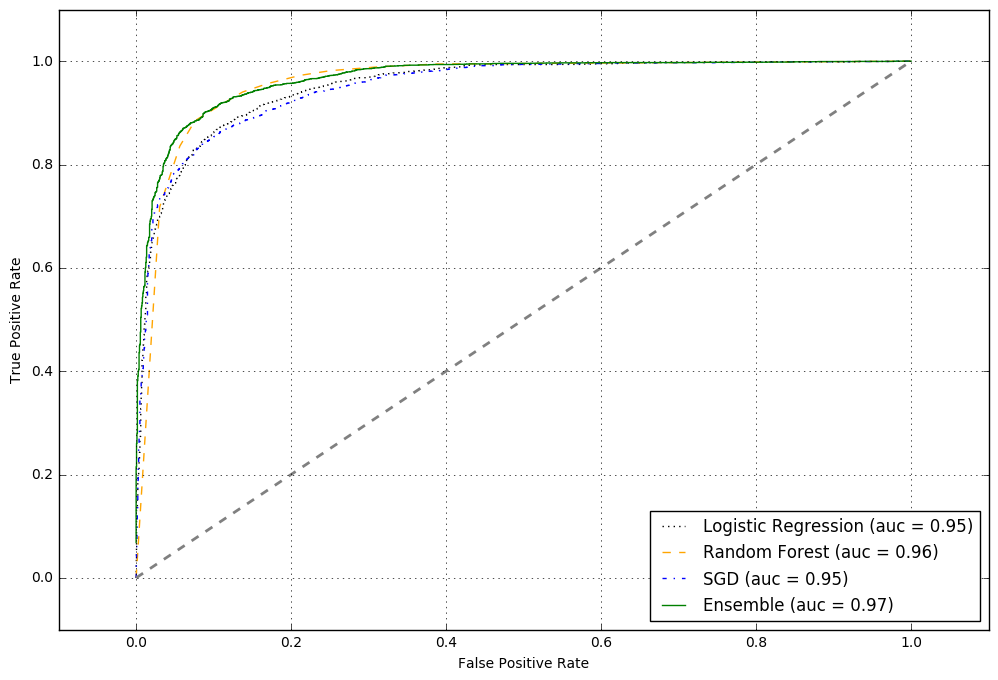

In [24]:
# roc curve on test data
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip([clf1, clf2, clf3, eclf], 
                               ['Logistic Regression', 'Random Forest', 'SGD', 'Ensemble'], 
                               colors, linestyles):
    y_pred = clf.fit(X_train[best_features], y_train).predict_proba(X_test[best_features])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC AUC values obtained for the cross validation and for the test sample are the same, which indicates that the model is not overfitted and not underfitted.

### 8. Getting the final result

In [25]:
result_pred = eclf.fit(X_train[best_features], y_train).predict_proba(test[best_features])
result = pd.DataFrame(test['USER_ID'])
result['ACTIVITY_DEC_16_PROB'] = list(result_pred[:, 1])
result.to_csv('result.csv', encoding='utf8', index=None)